
# DATA ANALYSIS & AI/OPTIMIZATION PROJECT - Features Selection


In [2]:
# System imports
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime
from time import process_time

# Extra library imports
from PIL import Image
from scipy.optimize import minimize
import scipy.ndimage as ndi
import pandas as pd
import numpy as np

In [3]:
directory_path1="./Images - whitout 154"
directory_path2="./train/masks"

## 1) Symmetry Index

This code's goal is to diplay :
- a list of the symmetry indexes for every images indexes
- a description of this list including the highest and lowest symmetry indexes
- the images with the highest and lowest symmetry indexes




### 1.1 Writing the function to compute the symmetry index for every image 

In [7]:
def calculate_symmetry(image_path):
    im_arr=np.array(Image.open(image_path)) #load image

    sx, sy, nb_channels = im_arr.shape

    # Split the image into left and right halves
    mid_index = sy // 2
    left_half = im_arr[:, :mid_index]
    right_half = im_arr[:, mid_index:]
    right_half = np.fliplr(right_half)

    # Calculate the difference and symmetry index
    difference = np.abs(left_half - right_half)
    symmetry_score = np.sum(difference)
    total_pixels = np.product(left_half.shape)
    symmetry_index = symmetry_score / total_pixels

    return 1 - symmetry_index / (255 * 3)

### 1.2 Creating a dataframe with every indexes and symmetry indexes

In [9]:
data = []
    
# Collect symmetry index for each image
for image_path in glob.glob(os.path.join(directory_path1, '*.JPG')):
    symmetry_index = calculate_symmetry(image_path)
    image_index = int(os.path.basename(image_path).split('.')[0])
    data.append({'Image Index': image_index, 'Symmetry Index': symmetry_index})
    
# Create the DataFrame from symmetry data
df = pd.DataFrame(data)
df.set_index('Image Index', inplace=True)
df.sort_index(inplace=True)

df

,Symmetry Index
Image Index,
1,0.974690
2,0.979744
3,0.957762
4,0.964526
5,0.996709
...,...
246,0.987543
247,0.957781
248,0.965972


In [10]:
df.describe()

,Symmetry Index
count,249.000000
mean,0.929881
std,0.057469
min,0.800712
25%,0.866408
50%,0.958275
75%,0.980615
max,0.999846


### 1.3 Display the images with the highest and lowest symmetry indexes

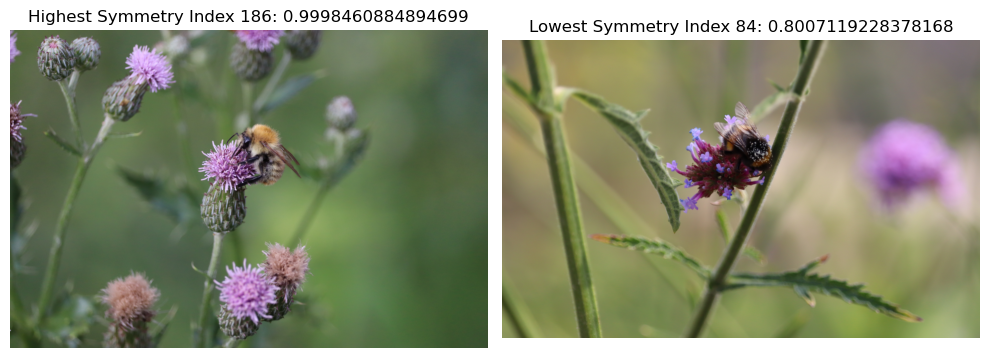

In [12]:
# Find the image index with the highest symmetry index
max_sym_index = df['Symmetry Index'].idxmax()
# Find the image index with the lowest symmetry index
min_sym_index = df['Symmetry Index'].idxmin()

# Display images with the highest and lowest symmetry index
plt.figure(figsize=(10, 5))
    
# High symmetry
image_path_high = os.path.join(directory_path1, f'{max_sym_index}.JPG')
image_high = Image.open(image_path_high)
plt.subplot(1, 2, 1)
plt.imshow(image_high)
plt.title(f'Highest Symmetry Index {max_sym_index}: {df.loc[max_sym_index, "Symmetry Index"]}')
plt.axis('off')
    
# Low symmetry
image_path_low = os.path.join(directory_path1, f'{min_sym_index}.JPG')
image_low = Image.open(image_path_low)
plt.subplot(1, 2, 2)
plt.imshow(image_low)
plt.title(f'Lowest Symmetry Index {min_sym_index}: {df.loc[min_sym_index, "Symmetry Index"]}')
plt.axis('off')
    
plt.tight_layout()
plt.show()

## 2. Ratio

This code's goal is to diplay :
- a list of the masks ratios for every images indexes
- a description of this list including the highest and lowest ratios
- the masks with the highest and lowest ratio


### 2.1 Writing the function to measure the ratio of each bug

In [16]:
def measure_bug(image_path):
    # Load the image and convert to grayscale
    img = np.array(Image.open(image_path).convert('L'))
    
    # Find indices where bug exists
    rows, cols = np.where(img == 255)
    
    # Find the bounding box
    min_row, max_row = np.min(rows), np.max(rows)
    min_col, max_col = np.min(cols), np.max(cols)
    
    # Compute dimensions of the bounding box
    length = max_col - min_col
    width = max_row - min_row
    
    # Calculate the ratio (width to length)
    if length > width:
        ratio = width / length
    else:
        ratio = length / width
        
    return ratio

### 2.2 Adding the ratios to the dataframe

In [18]:
ratio_dict = {}

# Collect ratio for each image
for image_path in glob.glob(os.path.join(directory_path2, '*.tif')):
    ratio = measure_bug(image_path)
    image_index = int(os.path.basename(image_path).split('_')[1].split('.')[0])
    ratio_dict[image_index] = ratio

# Create a Series from the dictionary
ratio_series = pd.Series(ratio_dict)

# Add the ratio series to df1
df['Ratio'] = ratio_series

df

,Symmetry Index,Ratio
Image Index,,
1,0.974690,0.810769
2,0.979744,0.652071
3,0.957762,0.935657
4,0.964526,0.771370
5,0.996709,0.823313
...,...,...
246,0.987543,0.830645
247,0.957781,0.781865
248,0.965972,0.776596


In [19]:
df.describe()

,Symmetry Index,Ratio
count,249.000000,249.000000
mean,0.929881,0.818632
std,0.057469,0.130297
min,0.800712,0.310228
25%,0.866408,0.738174
50%,0.958275,0.838812
75%,0.980615,0.922462
max,0.999846,1.000000


### 2.3 Display the images with the highest and lowest ratios

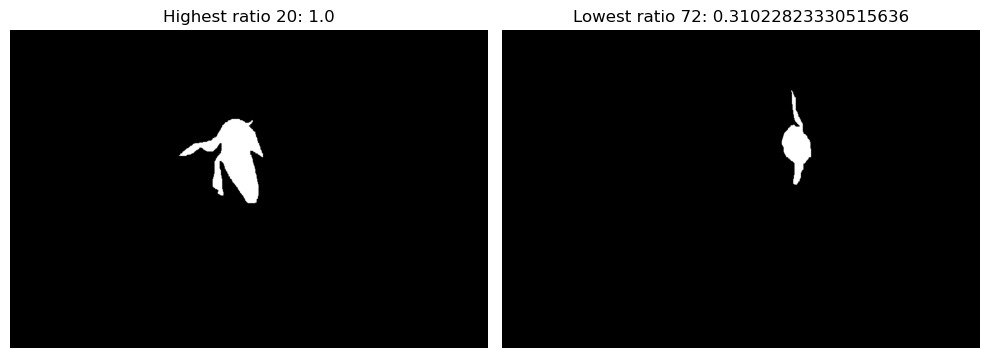

In [21]:
# Find the image index with the highest ratio
max_ratio = df['Ratio'].idxmax()
# Find the image index with the lowest ratio
min_ratio = df['Ratio'].idxmin()

# Display images with the highest and lowest ratio
plt.figure(figsize=(10, 5))
    
# High ratio
image_path_high = os.path.join(directory_path2, f'binary_{max_ratio}.tif')
image_high = Image.open(image_path_high)
plt.subplot(1, 2, 1)
plt.imshow(image_high, cmap='gray')
plt.title(f'Highest ratio {max_ratio}: {df.loc[max_ratio, "Ratio"]}')
plt.axis('off')
    
# Low ratio
image_path_low = os.path.join(directory_path2, f'binary_{min_ratio}.tif')
image_low = Image.open(image_path_low)
plt.subplot(1, 2, 2)
plt.imshow(image_low, cmap='gray')
plt.title(f'Lowest ratio {min_ratio}: {df.loc[min_ratio, "Ratio"]}')
plt.axis('off')
    
plt.tight_layout()
plt.show()

## 3. Pixel Ratio

This code's goal is to diplay :
- a list of the pixel ratios for every images indexes
- a description of this list including the highest and lowest pixel ratios
- the images with the highest and lowest pixel ratio

### 3.1 Writing the functions to measure the number of pixels

In [25]:
def measure_pixels(image_path):
    # Load the image and convert to grayscale
    image = Image.open(image_path)  
    
    # Get image dimensions
    width, height = image.size
        
    return width * height

In [26]:
def measure_pixels_mask(image_path):
    mask = Image.open(image_path).convert('L')

    mask_array = np.array(mask)
    
    return np.sum(mask_array == 255)

### 3.2 Adding the pixel ratios to the dataframe

In [28]:
# Dictionaries to store pixel counts
pixels_image = {}
pixels_mask = {}

# Collect pixel counts for each image
for image_path in glob.glob(os.path.join(directory_path1, '*.JPG')):
    num_pixels1 = measure_pixels(image_path)
    image_index = int(os.path.basename(image_path).split('.')[0]) 
    pixels_image[image_index] = num_pixels1
        
# Collect pixel counts for each mask
for image_path in glob.glob(os.path.join(directory_path2, '*.tif')):
    num_pixels2 = measure_pixels_mask(image_path)
    image_index = int(os.path.basename(image_path).split('_')[1].split('.')[0]) 
    pixels_mask[image_index] = num_pixels2

# Create Pixel Ratio column
df['Pixel Ratio'] = [pixels_mask[idx] / pixels_image[idx] if idx in pixels_image and idx in pixels_mask else None for idx in df.index]

df

,Symmetry Index,Ratio,Pixel Ratio
Image Index,,,
1,0.974690,0.810769,0.006951
2,0.979744,0.652071,0.008023
3,0.957762,0.935657,0.021430
4,0.964526,0.771370,0.012538
5,0.996709,0.823313,0.008745
...,...,...,...
246,0.987543,0.830645,0.006250
247,0.957781,0.781865,0.020050
248,0.965972,0.776596,0.007032


In [29]:
df.describe()

,Symmetry Index,Ratio,Pixel Ratio
count,249.000000,249.000000,249.000000
mean,0.929881,0.818632,0.022883
std,0.057469,0.130297,0.016881
min,0.800712,0.310228,0.003460
25%,0.866408,0.738174,0.013245
50%,0.958275,0.838812,0.020054
75%,0.980615,0.922462,0.028377
max,0.999846,1.000000,0.187458


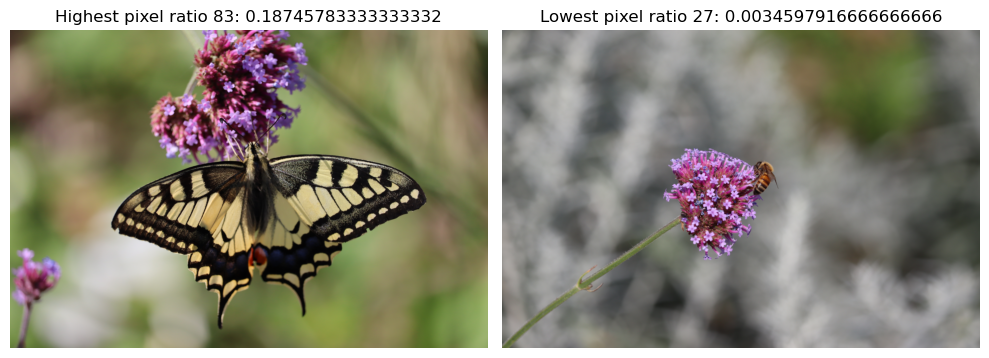

In [31]:
# Find the image index with the highest symmetry index
max_pixel_ratio = df['Pixel Ratio'].idxmax()
# Find the image index with the lowest symmetry index
min_pixel_ratio = df['Pixel Ratio'].idxmin()

# Display images with the highest and lowest symmetry index
plt.figure(figsize=(10, 5))
    
# High pixel ratio
image_path_high = os.path.join(directory_path1, f'{max_pixel_ratio}.JPG')
image_high = Image.open(image_path_high)
plt.subplot(1, 2, 1)
plt.imshow(image_high)
plt.title(f'Highest pixel ratio {max_pixel_ratio}: {df.loc[max_pixel_ratio, "Pixel Ratio"]}')
plt.axis('off')
    
# Low pixel ratio
image_path_low = os.path.join(directory_path1, f'{min_pixel_ratio}.JPG')
image_low = Image.open(image_path_low)
plt.subplot(1, 2, 2)
plt.imshow(image_low)
plt.title(f'Lowest pixel ratio {min_pixel_ratio}: {df.loc[min_pixel_ratio, "Pixel Ratio"]}')
plt.axis('off')
    
plt.tight_layout()
plt.show()